## Data Preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("customer churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.columns = df.columns.str.lower().str.replace(" ","_")

categorical_columns = list(df.dtypes[df.dtypes == "object"].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ","_")

In [5]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors="coerce")

In [8]:
df.totalcharges = df.totalcharges.fillna(0)

In [9]:
df.churn = (df.churn == "yes").astype(int)

In [10]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

## Setting up Validation framework

perform train/validation/test with sklearn

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state= 1)

In [13]:
len(df_full_train), len(df_test)

(5634, 1409)

In [14]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state= 1)

In [15]:
len(df_train), len(df_val),len(df_test)

(4225, 1409, 1409)

In [16]:
df_train= df_train.reset_index(drop =True)
df_val= df_val.reset_index(drop =True)
df_test= df_test.reset_index(drop =True)

In [17]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [18]:
del df_train ["churn"]
del df_val ["churn"]
del df_test["churn"]


## EDA

- check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [19]:
df_full_train = df_full_train.reset_index(drop = True)
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [20]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [21]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [22]:
## churn rate
df_full_train.churn.value_counts(normalize= True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [23]:
global_churn_rate = df_full_train.churn.mean()

In [24]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [25]:
## numerical variables. seniorcitizen is a categorical variable -1,0

numerical = ["tenure", "monthlycharges", "totalcharges" ]

In [26]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [27]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [28]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

- churn rate
- risk ratio
- mutual information

Churn rate

In [29]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [30]:
churn_female = df_full_train[df_full_train.gender == "female"].churn.mean()
churn_female

0.27682403433476394

In [31]:
churn_male = df_full_train[df_full_train.gender == "male"].churn.mean()
churn_male

0.2632135306553911

In [32]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [33]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [34]:
churn_partner = df_full_train[df_full_train.partner == "yes"].churn.mean()
churn_partner

0.20503330866025166

In [35]:
churn_no_partner = df_full_train[df_full_train.partner == "no"].churn.mean()
churn_no_partner

0.3298090040927694

In [36]:
print(global_churn - churn_male)
print(global_churn - churn_female)
print(global_churn - churn_no_partner)
print(global_churn - churn_partner)

0.006754520462819769
-0.006855983216553063
-0.05984095297455855
0.06493474245795922


From the code block,. it is obvious that the partner column has more impact on the target variable - churn colummn. This is because the difference is significantly bigger.

## Feature importance

### Risk ratio

In [37]:
churn_no_partner/global_churn

1.2216593879412643

In [38]:
churn_partner / global_churn

0.7594724924338315

In [39]:
df_group = df_full_train.groupby("gender").churn.agg(["mean", "count"])
df_group

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [40]:
df_group["dif"] = df_group['mean'] - global_churn
df_group["risk"] = df_group['mean'] / global_churn
df_group

,mean,count,dif,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [41]:
from IPython.display import display

In [42]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(["mean", "count"])
    df_group["dif"] = df_group['mean'] - global_churn
    df_group["risk"] = df_group['mean'] / global_churn
    display(df_group)
    print()

gender


,mean,count,dif,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980



seniorcitizen


,mean,count,dif,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208



partner


,mean,count,dif,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472



dependents


,mean,count,dif,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651



phoneservice


,mean,count,dif,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412



multiplelines


,mean,count,dif,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948



internetservice


,mean,count,dif,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201



onlinesecurity


,mean,count,dif,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570



onlinebackup


,mean,count,dif,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660



deviceprotection


,mean,count,dif,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480



techsupport


,mean,count,dif,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390



streamingtv


,mean,count,dif,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328



streamingmovies


,mean,count,dif,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182



contract


,mean,count,dif,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730



paperlessbilling


,mean,count,dif,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560



paymentmethod


,mean,count,dif,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


As the churn risk exceeds 1, it is to susceptible to risk/.

# 3.6 Feature importance: Mutual Information

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another.

If we observe all the variables, how much do we learn about the target variables. If we observe that this customer has a month to month contract, how much do we know about churn? Theh higher the score, the higher the importance of the variable on the target variable.

In [43]:
from sklearn.metrics import mutual_info_score

In [44]:
## same value regardless of the order

mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [45]:
mutual_info_score(df_full_train.gender, df_full_train.contract)

7.35465609829622e-05

In [46]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [47]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [48]:
mi=df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# 3.6 Feature importance: Correlation

This is a way to measure the importance of numerical columns

    - Correlation coefficient:- Pearson_correlation_coefficient
Mostly for numeric variables

In [49]:
df_full_train.tenure.max()

72

In [50]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [51]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [52]:
df_full_train[df_full_train.tenure <=2 ].churn.mean()

0.5953420669577875

In [53]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [54]:
df_full_train[df_full_train.tenure > 12 ].churn.mean()

0.17634908339788277

# 3.8 One-hot encoding

In [55]:
from sklearn.feature_extraction import DictVectorizer

In [56]:
df_train[["gender", "contract"]].iloc[:100]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
95,male,one_year
96,female,month-to-month
97,male,month-to-month
98,male,one_year


In [57]:
## orient=records mean raw wise.

dicts = df_train[["gender", "contract", "tenure"]].iloc[:100].to_dict(orient = "records")

In [58]:
dv = DictVectorizer(sparse = False)

In [59]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [60]:
dv.get_feature_names()

C:\Users\eddye\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male',
 'tenure']

In [61]:
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

In [62]:
## all

train_dicts = df_train[categorical + numerical].to_dict(orient = "records")

In [63]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [64]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [65]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [66]:
list(dv.transform(train_dicts[:5])[0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

In [67]:
X_train = dv.transform(train_dicts)

In [68]:
X_train.shape

(4225, 45)

In [69]:
## all

val_dicts = df_val[categorical + numerical].to_dict(orient = "records")
X_val = dv.transform(val_dicts)

## 3.9 Logistic regression

- Binary classification
- Linear vs logistic regression

In [70]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [71]:
z= np.linspace(-7, 7,51)

In [72]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

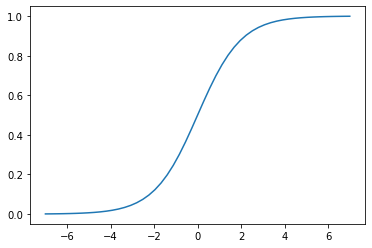

In [73]:
plt.plot(z,sigmoid(z))

In [74]:
sigmoid(19000909)

1.0

In [75]:
def linear_regression(xi):
    
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    
    return result

In [76]:
def linear_regression(xi):
    
    result = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

In both cases, we use the dot product and in both cases, the dot product is called the linear operator. Linear models are quite fast and have goos properties. 

## 3.10 Training logistic regression with scikit-learn

- Train a model with scikit-learn
- APply it to the validation dataset
- Calculate the accuracy

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [79]:
model.intercept_[0]

-0.10907153920556581

In [80]:
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [81]:
## hard predictions
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [82]:
## soft predictions

## probability [0,1] is why it is dimesnsional
model.predict_proba(X_train)

array([[0.90442519, 0.09557481],
       [0.32075391, 0.67924609],
       [0.3664    , 0.6336    ],
       ...,
       [0.46840848, 0.53159152],
       [0.95750049, 0.04249951],
       [0.30139435, 0.69860565]])

In [83]:
## soft predictions

## probability [0,1] is why it is dimesnsional
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00899922, 0.20435726, 0.21203736, ..., 0.13638714, 0.79969074,
       0.83733007])

In [84]:
churn_decision = (y_pred >= 0.5)

In [85]:
## customerid with a high probability to churn

df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [86]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [87]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [88]:
(y_val == churn_decision).mean()

0.8034066713981547

In [103]:
df_pred = pd.DataFrame()
df_pred["probability"] = y_pred
df_pred["prediction"] = churn_decision.astype(int)
df_pred["actual"] = y_val

In [104]:
df_pred

,probability,prediction,actual
0,0.008999,0,0
1,0.204357,0,0
2,0.212037,0,0
3,0.542996,1,1
4,0.213615,0,0
...,...,...,...
1404,0.313509,0,0
1405,0.039358,0,1
1406,0.136387,0,0
1407,0.799691,1,1


In [105]:
df_pred["correct"] = df_pred.prediction == df_pred.actual

In [106]:
df_pred

,probability,prediction,actual,correct
0,0.008999,0,0,True
1,0.204357,0,0,True
2,0.212037,0,0,True
3,0.542996,1,1,True
4,0.213615,0,0,True
...,...,...,...,...
1404,0.313509,0,0,True
1405,0.039358,0,1,False
1406,0.136387,0,0,True
1407,0.799691,1,1,True


In [108]:
df_pred.correct.mean()

0.8034066713981547

## 3.11 Model Explanation

- Look at the coefficients
- Train a smaller model with fewer features

In [135]:
dict(zip(dv.get_feature_names() , model.coef_[0].round(3)))

C:\Users\eddye\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.474,
 'contract=one_year': -0.175,
 'contract=two_year': -0.407,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.123,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [136]:
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [137]:
small = ["contract", "tenure", "monthlycharges"]

In [138]:
df_train[small].iloc[:10].to_dict(orient = 'records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [139]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [140]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [141]:
dv_small.get_feature_names()

C:\Users\eddye\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [142]:
dicts_train_small

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 99.9},
 {'contract': 'month-to-month', 'tenure': 17, 'monthlycharges': 102.55},
 {'contract': 'two_year', 'tenure': 66, 'monthlycharges': 58.2},
 {'contract': 'month-to-month', 'tenure': 2, 'monthlycharges': 68.95},
 {'contract': 'month-to-month', 't

In [143]:
X_train_small = dv_small.transform(dicts_train_small)

In [144]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [145]:
w0 = model_small.intercept_[0]
w0

-2.476775658711709

In [146]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [147]:
dict(zip(dv.get_feature_names_out() , w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'dependents=no': 0.027,
 'dependents=yes': -0.036}

In [148]:
-2.47 +0.97+(60*0.027) +  1*(-0.036)

0.08399999999999966

In [149]:
## _ means last output

sigmoid(_)

0.5209876607065322

# 3.12 Using the model

In [150]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

In [153]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_full_train)

In [155]:
y_full_train = df_full_train.churn.values

In [156]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [158]:
dicts_test= df_test[categorical + numerical].to_dict(orient = 'records')

In [159]:
X_test= dv.transform(dicts_test)

In [160]:
y_pred = model.predict_proba(X_test)[:,1]

In [161]:
churn_decision = (y_pred >= 0.5)

In [162]:
(churn_decision == y_test).mean()

0.815471965933286

In [163]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [164]:
X_small = dv.transform([customer])

In [165]:
X_small.shape

(1, 45)

In [167]:
model.predict_proba(X_small)[0,1]

0.40568109779885553

In [168]:
y_test[10]

0

In [169]:
## TRYING ANPTHER CUSTOMER

customer = dicts_test[-1]

X_small = dv.transform([customer])

model.predict_proba(X_small)[0,1]

0.5968852088415657

In [170]:
y_test[-1]

1